# Just computations

In [1]:
import torch
import numpy as np

In [2]:
# numpy world

x = np.arange(16).reshape(4, 4)

print("X :\n %s" % x)
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n", np.dot(x, x.T))
print("mean over cols :\n%s" % (x.mean(axis=-1)))
print("cumsum of cols :\n%s" % (np.cumsum(x, axis=0)))

X :
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
X*X^T  :
 [[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
mean over cols :
[ 1.5  5.5  9.5 13.5]
cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]


In [3]:
# pytorch world

x = np.arange(16).reshape(4, 4)

y = torch.from_numpy(x)
print('Type of y:', type(y))
y = torch.from_numpy(x).type(torch.FloatTensor)
print('Type of y', type(y))

Type of y: <class 'torch.Tensor'>
Type of y <class 'torch.Tensor'>


In [5]:
x = torch.arange(0, 16).view(4, 4).float()
print('Type of x:', type(x))

print("X :\n%s" % x)
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n", torch.matmul(x, x.transpose(1, 0)))
print("mean over cols :\n", torch.mean(x, dim=-1))
print("cumsum of cols :\n", torch.cumsum(x, dim=0))

Type of x: <class 'torch.Tensor'>
X :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
add 5 :
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T  :
 tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
 tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


## NumPy vs Pytorch

Both Numpy and Pytorch don't require precompiled computational graph.

For debug one may use pdb or debug output with print.

API of NumPy and Pytorch differs sligtly:

```
x.reshape([1,2,8]) -> x.view(1,2,8)
x.sum(axis=-1) -> x.sum(dim=-1)
x.astype('int64') -> x.type(torch.LongTensor)
```

Easy to convert:

```
torch.from_numpy(npx) -- returns Tensor
tt.numpy() -- returns Numpy Array
```

Troubleshooting:
- read the docs
- google (Stackoverflow/tutorials)

In [5]:
x = torch.linspace(0, 2 * np.pi, 16)

# Mini-task: compute a vector of sin^2(x) + cos^2(x)
out = torch.sin(x)**2 + torch.cos(x)**2

print(out.numpy())

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


## In-place operations

The memory must be used efficiently when working with large tensors.
Some operations create new object as the result of computations,
others just change given object (in-place operations).
In pytorch, these operations usually differ by adding an underscore:
```
x.exp()   # not-in-place operation
x.exp_()  # in-place operation
```

In [7]:
x = torch.arange(4).float()
print('Not-in-place:')
print('\tx.exp():\t\t', x.exp().numpy())
print('\tx:\t\t\t', x.numpy())
print('In-place:')
print('\tx.exp_():\t\t', x.exp_().numpy())
print('\tx after x.exp_():\t', x.numpy())

Not-in-place:
	x.exp():		 [ 1.         2.7182817  7.389056  20.085537 ]
	x:			 [0. 1. 2. 3.]
In-place:
	x.exp_():		 [ 1.         2.7182817  7.389056  20.085537 ]
	x after x.exp_():	 [ 1.         2.7182817  7.389056  20.085537 ]


In [8]:
x = torch.arange(0, 4).view(2, 2)
y = torch.arange(4, 8).view(2, 2)
z = torch.arange(8, 12).view(2, 2)

# Not-in-place:
u = x + 2 * y - z    # 3 array allocations?
print(u.numpy())

# In-place
u = y.clone()        # 1 array allocation
u.mul_(2)
u.add_(x)
u.sub_(z)
print(u.numpy())

[[0 2]
 [4 6]]
[[0 2]
 [4 6]]


## Broadcasting in pytorch (similar to numpy)

In [9]:
a = torch.Tensor([1, 1, 1, 2]).view(4, 1)
b = torch.Tensor([1, 0, 1, 0]).view(1, 4)
c = torch.randn(16).view(4, 4)
print('a:', a)
print('b:', b)
print('a + b:', a + b)
print('c:', c)
print('b + c:', b + c)

a: tensor([[1.],
        [1.],
        [1.],
        [2.]])
b: tensor([[1., 0., 1., 0.]])
a + b: tensor([[2., 1., 2., 1.],
        [2., 1., 2., 1.],
        [2., 1., 2., 1.],
        [3., 2., 3., 2.]])
c: tensor([[-0.2284,  1.0384,  1.3887, -0.4445],
        [ 0.3789,  0.1920,  0.5735, -0.3367],
        [-0.9887, -0.7452,  0.4337,  0.8380],
        [ 0.3519,  1.2024,  1.4539, -1.5165]])
b + c: tensor([[ 0.7716,  1.0384,  2.3887, -0.4445],
        [ 1.3789,  0.1920,  1.5735, -0.3367],
        [ 0.0113, -0.7452,  1.4337,  0.8380],
        [ 1.3519,  1.2024,  2.4539, -1.5165]])


For more information see http://pytorch.org/docs/master/notes/broadcasting.html

## Problem #1: Tensors

100 objects are given, each object is 10-dimensional tensor. Also 5 points in 10-dimensional space are given. The objects and the points are stored in matrices X and Y respectively.

For each object from X it is required to find an index of the nearest point from Y using only tensor operations
(loops, list comprehensions, recursion, etc are prohibited 
because they significantly slow down the solution).

The good solution requires $O(NM)$ additional memory instead of $O(NMD)$, where N, M, D are number of objects, number of points and the dimensinality of space respectively.

Hint: you can find a matrix of pairwise scalar products between objects and points using a single matrix multiplication.

In [10]:
X = torch.randn(100, 10)
Y = torch.randn(5, 10)

array([0, 3, 3, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 3, 3, 1, 2, 0, 0, 1, 0,
       4, 2, 0, 1, 0, 2, 4, 1, 4, 0, 1, 1, 0, 4, 1, 0, 1, 0, 1, 3, 1, 2,
       1, 0, 0, 0, 1, 0, 1, 1, 3, 2, 4, 0, 1, 1, 4, 3, 0, 2, 2, 3, 1, 4,
       4, 2, 1, 1, 2, 3, 4, 1, 0, 0, 3, 4, 0, 3, 1, 3, 0, 3, 0, 1, 3, 0,
       0, 0, 1, 4, 1, 0, 1, 1, 0, 0, 4, 1])

In [11]:
# your code here


array([2, 1, 0, 2, 2, 1, 2, 3, 1, 3, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, 1, 3, 3,
       0, 1, 2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 2, 2, 0, 4, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 2, 0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1,
       2, 3, 2, 0, 3, 3, 2, 2, 1, 4, 1, 4, 1, 2, 0, 4, 2, 0, 3, 1, 1, 0, 4,
       2, 2, 2, 2, 2, 3, 1, 4])

## GPU computations
`x.cuda()` copies tensor to GPU and returns result.
One can explicitly specify the index of the GPU on which to copy the tensor: `x.cuda(gpu_id)`.
If the tensor is already stored on the desired GPU, then the tensor itself is returned, no copying is performed.
`x.cpu()` works similarly.

One can set `CUDA_VISIBLE_DEVICES` environment variable.
If it is specified, then `gpu_id` is an index of a GPU the list of visible GPUs.

Operations can be performed only on tensors stored on one device.
Violation of this rule leads to an error.
The result of the operation is on the same device as the operands.

One can use `x.device` to determine on which GPU (or CPU) `x` is stored.
To move tensor on the device `.to` is also usefull: `y.to(x.device)`.
Also the majority of tensor constructors have optional `device` argument, e. g. `torch.randn(5, device='cuda:0')`.

# Automatic Differentiation

Gradient automatic computation using backpropagation:

1. Create a tensor/tensors which requires gradient: `a = torch.tensor(..., requires_grad=True)`

2. Define some differentiable _scalar_ function `loss = whatever(a)`

3. Request backward pass `loss.backward()`

4. The gradient is available as `a.grad`

Note the loss must be a function of at least one tensor which requires gradient.

For more information see https://pytorch.org/docs/stable/autograd.html

The difference** between Pytorch and Theano/TensorFlow:

1. The loss function can be altered dynamically, e. g. for each minibatch.

2. After calling `.backward()`, gradients are stored in the `.grad` field of each involved variable. If one calls `.backward()` for several functions of the same variable, `.grad` of the variable contains the sum of gradients of those functions. One can use that to use several loss functions or virtually increase batch size. After each optimizer's step those gradients must be reset (e. g. by using `optimizer.zero_grad()`).

** - now Pytorch supports computational graphs for boosting performance in production as well. It uses <a href="https://en.wikipedia.org/wiki/Just-in-time_compilation">JIT</a>, so that one can easily transform their Pytorch code into TorchScript using a couple of decorators. For more information see https://pytorch.org/docs/stable/jit.html.

### A simple example

In [16]:
x = torch.randn(4, requires_grad=True)
y = torch.randn(4, requires_grad=True)
z = x * y + 10
p = z.sum()
p.backward()
print('x:', x.data)
print('y:', y.data)
print('dp / dx:', x.grad)
print('dp / dy:', y.grad)

x: tensor([-1.3333, -0.5294, -0.0482, -0.5393])
y: tensor([ 1.9426,  1.1428, -1.8924,  0.5577])
dp / dx: tensor([ 1.9426,  1.1428, -1.8924,  0.5577])
dp / dy: tensor([-1.3333, -0.5294, -0.0482, -0.5393])


### Detaching variables
`.detach()` returns a copy of a variable, through which backpropagation doesn't pass.
If you average or just store batch losses during the optimization, you'd better detach those losses before averaging or storing.
Otherwise the computational graphs for each batch would be stored in memory as well as batch losses, so you run out of memory very fast.

Also there is in-place version (`.detach_()`) which doesn't create detached copy of the variable, but detach variable itself from its computational graph.

In [39]:
x = torch.randn(4, requires_grad=True)
y0 = torch.randn(4, requires_grad=True)
y = y0.detach()
z = x * y + 10
p = z.sum()
p.backward()
print('x:', x.data)
print('y:', y.data)
print('dp / dx:', x.grad)
print('dp / dy:', y.grad)

x: tensor([ 2.3568,  1.1385, -0.8198,  0.5400])
y: tensor([ 1.0990, -4.3158,  2.2558,  1.3052])
dp / dx: tensor([ 1.0990, -4.3158,  2.2558,  1.3052])
dp / dy: None


### Gradient reset

In [28]:
x = torch.tensor([1., 1, 1, 1], requires_grad=True)
y = x ** 2
p = y.sum()
p.backward()
print('x:', x)
print('dp / dx:', x.grad)
y = 1 / x
p = y.sum()
p.backward()
print('x:', x)
print('dp / dx:', x.grad)

x: tensor([1., 1., 1., 1.], requires_grad=True)
dp / dx: tensor([2., 2., 2., 2.])
x: tensor([1., 1., 1., 1.], requires_grad=True)
dp / dx: tensor([1., 1., 1., 1.])


In [33]:
x = torch.tensor([1, 1, 1, 1.], requires_grad=True)
y = x ** 2
p = y.sum()
p.backward()
print('x:', x)
print('dp / dx:', x.grad)
x.grad.detach_()       # extracting gradient Variable from the previous computational graph (optional)
x.grad.zero_()         # zero gradinents
y = 1 / x
p = y.sum()
p.backward()
print('x:', x)
print('dp / dx:', x.grad)

x: tensor([1., 1., 1., 1.], requires_grad=True)
dp / dx: tensor([2., 2., 2., 2.])
x: tensor([1., 1., 1., 1.], requires_grad=True)
dp / dx: tensor([-1., -1., -1., -1.])


### Leaf vs Non-leaf Variable

For memory saving, gradients are stored only for so called `leaf-variable`s.

In [34]:
x = torch.randn(4, requires_grad=True)  # leaf variable
y = x + 1                               # not a leaf variable
p = y.sum()                             # not a leaf variable
p.backward()
print('x:', x)
print('y:', y)
print('p:', p)
print('x.grad:', x.grad)
print('y.grad:', y.grad)
print('p.grad:', p.grad)

x: tensor([-1.5496,  0.3766, -0.9040, -0.2435], requires_grad=True)
y: tensor([-0.5496,  1.3766,  0.0960,  0.7565], grad_fn=<AddBackward0>)
p: tensor(1.6795, grad_fn=<SumBackward0>)
x.grad: tensor([1., 1., 1., 1.])
y.grad: None
p.grad: None


In [35]:
x = torch.randn(4, requires_grad=True)  # leaf variable
y = torch.randn(4, requires_grad=True)  # leaf variable
z = x + y    # not a leaf variable
p = z.sum()  # not a leaf variable
p.backward()
print('x.grad:', x.grad)
print('y.grad:', y.grad)
print('z.grad:', z.grad)
print('p.grad:', p.grad)
print('x.is_leaf:', x.is_leaf)
print('y.is_leaf:', y.is_leaf)
print('z.is_leaf:', z.is_leaf)
print('p.is_leaf:', p.is_leaf)

x.grad: tensor([1., 1., 1., 1.])
y.grad: tensor([1., 1., 1., 1.])
z.grad: None
p.grad: None
x.is_leaf: True
y.is_leaf: True
z.is_leaf: False
p.is_leaf: False


### Gradients for non-leaf variables
One can use `.retain_grad()` to save gradients for non-leaf variables. 

In [36]:
x = torch.randn(4, requires_grad=True)   # leaf variable
z = torch.randn(4, requires_grad=True)   # leaf variable
w = z * 2      # not a leaf variable
y = x * w + 1  # forward pass before retaining gradient is ok
p = y.sum()

w.retain_grad()

p.backward()
print('dp / dx:', x.grad)
print('dp / dz:', z.grad)
print('dp / dw:', w.grad)

dp / dx: tensor([ 1.7251,  0.8019, -2.9055,  4.9973])
dp / dz: tensor([-3.5128,  0.0063,  1.9552, -1.8944])
dp / dw: tensor([-1.7564,  0.0031,  0.9776, -0.9472])


Note that even if there are non-leaf varibales which require gradient in the computational graph, 
`.backward()` fail. For correct work one of the leaf variables must require gradient.

In [38]:
# will not work
x = torch.randn(4, requires_grad=False)   # leaf variable
z = torch.randn(4, requires_grad=False)   # leaf variable
w = z * 2      # not a leaf variable
y = x * w + 1  # forward pass before retaining gradient is ok
p = y.sum()

w.retain_grad()

p.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

## Problem #2: Optimization

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
X = torch.randn(50, 10)
b = torch.randn(2)
W = torch.randn(10, 2)

You are given some stange loss function which forces linear transformation to map 10-dimensional space points to 2-dimensional circle with radius 1. You should use gradient descent w. r. t. parameters of the transformation.

Linear transformation of point 10-dimensional $x$ into 2-dimensional point $y$ has weights $W$ and $b$, and the following form:
$$y = Wx + b$$

The norm in 2-dimensional space is Euclidean:
$$||y||_2 = \sqrt{y_1^2 + y_2^2}$$

Loss function $f_0$ penalizes the distance from $y$ to the circle with radius 1:
$$f_0(x, W, b) = 0.5 \cdot \big| ||y||_2 - 1 \big| + \big( ||y||_2 - 1 \big)^2$$

Unfirtunatelly, the optimization of $f_0$ w. r. t. $W$ and $b$ can be derived analytically
and leads to the trivial solution $W = 0$, $b = (1, 0)$.
In order to avoid such solution we also penalize the proximity of $y$ to $b$. This new penalty turns to $0$ if the distance from $y$ to $b$ is larger than $1$:
$$f_1(x, W, b) = \max\big(0, \frac{1}{||y - b||_2} - 1\big)$$

The final loss function is as follows:
$$f(x, W, b) = f_0(x, W, b) + f_1(x, W, b)$$

You have to solve the optimization problem:
$$\frac{1}{N}\sum\limits_{i = 1}^N f(x_i, W, b) \to \min\limits_{W, b}$$

In [31]:
def f(X, W, b):
    # your code here
    

In [32]:
print(f(X, W, b))

21.122261142730714


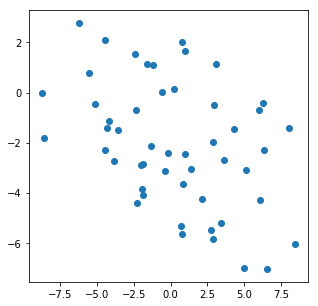

In [33]:
plt.figure(figsize=(5, 5))
Y = X.mm(W).add(b)
plt.scatter(Y[:, 0], Y[:, 1])

In [34]:
# your code here


0.842589
0.363394
0.307726
0.278642
0.262647
0.244216
0.222634
0.205349
0.197059
0.193335


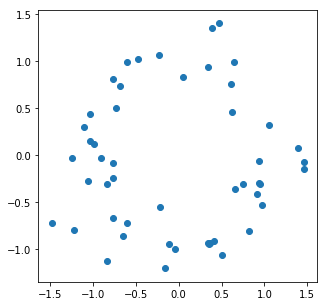

In [35]:
plt.figure(figsize=(5, 5))
Y = X.mm(W).add(b)
plt.scatter(Y[:, 0], Y[:, 1])

# Time to write neural network
Here we implement multilayer perceptron from scratch without usage of torch.nn module.

## Dataset

In [36]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [38]:
X_train = torch.from_numpy(X_train).type(torch.FloatTensor)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)
X_test = torch.from_numpy(X_test).type(torch.FloatTensor)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

Hint: neural nets are hardly train if their inputs have large absolute values.
That is why before training network each feature is normalized independently
(except of convolutional networks, for them the normalization is independent only for channels).

There are a lot of different ways to normalize your data.
One of the most popular way is to subtract mean and divide the result by standard deviation
(this method should be used carefully if standard deviation is close to zero; it is better to handle such cases separately).
Other popular ways are subtracting median and dividing by interquartile range, mapping all values into $[-1, 1]$ by subtracting minimum and then dividing by maximum or applying sigmoid function, etc

You should implement your data normalization here:

In [39]:
# your code here


## Linear layer implementation

In [52]:
class Module:
    def __init__(self):
        self.training = True
        self.children = []

    def forward(self, *input):
        raise NotImplementedError

    def __call__(self, *input):
        return self.forward(*input)

    def parameters(self):
        """Returns list of parameters of module and its children."""
        res = []
        for submodule in self.children:
            res += submodule.parameters()
        for param in res:
            if not isinstance(param, torch.Tesnor):
                raise Exception('Parameters must be Tensors.')
            if not param.requires_grad:
                raise Exception('Parameters must require gradients.')
        return res
    
    def zero_grad(self):
        """Sets gradients of all model parameters to zero."""
        for p in self.parameters():
            if p.grad is not None:
                p.grad.detach_()   # detachs gradient Variable from the computational graph
                p.grad.zero_()

    def train(self):
        """Sets module into train mode (for DropOut, BatchNorm, etc)."""
        self.training = True
        for submodule in self.children:
            submodule.train()

    def eval(self):
        """Sets module into evaluation mode."""
        self.training = False
        for submodule in self.children:
            submodule.eval()

In [41]:
class DenseLayer(Module):
    def __init__(self, input_units, output_units):
        """A dense layer is a layer which performs a learned affine transformation:
        f(x) = W x + b
        """
        super(Dense, self).__init__()
        # initialize weights with small random numbers from normal distribution
        self.weights = None  # your code here
        self.biases = None   # your code here

    def parameters(self):
        return [self.weights, self.biases]
        
    def forward(self, input):
        """Performs an affine transformation:
        f(x) = W x + b
        input shape:  [batch, input_units]  (Tensor)
        output shape: [batch, output units] (Tensor)
        """
        # your code here
        
        return output

In [42]:
class ReLU(Module):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs."""
        super(ReLU, self).__init__()

    def parameters(self):
        return []  # ReLU has no parameters
    
    def forward(self, input):
        """Applies elementwise ReLU to [batch, num_units] Tensor matrix."""
        # your code here
        
        return output

In [43]:
class LogSoftmax(Module):
    def __init__(self):
        super(LogSoftmax, self).__init__()

    def parameters(self):
        return []
        
    def forward(self, input):
        """Applies softmax to each row and then applies component-wise log.
        Input shape:  [batch, num_units] (Tensor)
        Output shape: [batch, num_units] (Tensor)
        """
        # your code here
        
        return output

In [44]:
class MyNetwork(Module):
    def __init__(self, input_size, hidden_layers_size, hidden_layers_number, output_size):
        super(MyNetwork, self).__init__()

        network = []
        network.append(Dense(input_size, hidden_layers_size))
        network.append(ReLU())
        for i in range(hidden_layers_number - 1):
            network.append(Dense(hidden_layers_size, hidden_layers_size))
            network.append(ReLU())
        network.append(Dense(hidden_layers_size, output_size))
        network.append(LogSoftmax())

        self.children = network

    def forward(self, input):
        """Applies all layers of neural network to the input.
        Input shape:  [batch, num_units] (Tensor)
        Output shape: [batch, num_units] (Tensor)
        """
        # your code here
        
        return output

In [45]:
network = MyNetwork(X_train.shape[1], 32, 1, 10)

## Loss function

In [46]:
def crossentropy(activations, target):
    """Returns negative log-likelihood of target under model
    represented by activations (log probabilities of classes).
    Tip: it is better to average crossentropy among objects
    instead of sum.
    Activations shape: [batch, num_classes] (Tensor)
    Target shape:      [batch]              (Tensor)
    Output shape: 1 (scalar, Tensor)
    """
    # your code here
    
    return loss

## Stochastic Gradient Descent

In [47]:
class SGDOptimizer:
    def __init__(self, parameters, learning_rate):
        self.parameters = parameters
        self.learning_rate = learning_rate

    def step(self):
        """Make one optimization step for parameters in-place.
        Assumes that all parameters are Variable with computed gradient.
        """
        for param in self.parameters:
            param.data -= self.learning_rate * param.grad.data

In [48]:
import torch.utils.data

In [49]:
def run_epoch(dataset, network, prefix='Test loss:', optimizer=None, verbose=True):
    # Change mode for all layers.
    if optimizer:
        network.train()
    else:
        network.eval()

    batch_size = 100
    batchgenerator = torch.utils.data.DataLoader(dataset, batch_size, True)

    avg_loss = 0
    for i, (batch_data, batch_target) in enumerate(batchgenerator):
        if optimizer:
            network.zero_grad()
        batch_output = network(batch_data)
        batch_loss = crossentropy(batch_output, batch_target)
        batch_loss.backward()
        batch_loss = float(batch_loss)
        avg_loss += (batch_loss - avg_loss) / (i + 1)
        if optimizer:
            optimizer.step()
    if verbose:
        print(prefix, avg_loss, flush=True)
    return avg_loss

In [50]:
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

network = MyNetwork(X_train.shape[1], 32, 1, 10)
sgd = SGDOptimizer(network.parameters(), 0.5)

num_epochs = 20
sgd_train_losses = []
sgd_test_losses = []
for i in range(num_epochs):
    loss = run_epoch(train_dataset, network, 'Train loss:', sgd)
    sgd_train_losses.append(loss)
    loss = run_epoch(test_dataset, network, 'Test loss:',  None)
    sgd_test_losses.append(loss)

Train loss: 2.25001299381
Test loss: 2.02255702019
Train loss: 0.935892488275
Test loss: 0.526892650127
Train loss: 0.311101637781
Test loss: 0.224462372065
Train loss: 0.162839947534
Test loss: 0.137114882469
Train loss: 0.116679061204
Test loss: 0.100092953444
Train loss: 0.0960424696761
Test loss: 0.0819583252072
Train loss: 0.0743240392102
Test loss: 0.0691537447274
Train loss: 0.0632074608334
Test loss: 0.0648413747549
Train loss: 0.0556773274605
Test loss: 0.0526380605996
Train loss: 0.0497626392171
Test loss: 0.0536358714104
Train loss: 0.0436364341793
Test loss: 0.0415103141218
Train loss: 0.0387461567963
Test loss: 0.0370218373835
Train loss: 0.0330237374375
Test loss: 0.0317714843899
Train loss: 0.0313186772567
Test loss: 0.0290575809777
Train loss: 0.0266977072959
Test loss: 0.0287078157067
Train loss: 0.0241593799022
Test loss: 0.0236087350175
Train loss: 0.0228125809559
Test loss: 0.0228643067181
Train loss: 0.0213984650826
Test loss: 0.0240131534636
Train loss: 0.01811318

## You need more optimizers!

In [51]:
class SGDMomentumOptimizer:
    def __init__(self, parameters, learning_rate=0.01, momentum=0.9):
        self.parameters = parameters
        self.learning_rate = learning_rate
        self.momentum = momentum
        # your code here
        

    def step(self):
        """Make one optimization step for parameters in-place.
        Assumes that all parameters are Variable with computed gradient.
        """
        # your code here
        pass

In [52]:
class RMSPropOptimizer:
    def __init__(self, parameters, learning_rate=0.01, beta=0.9, eps=1e-8):
        self.parameters = parameters
        self.learning_rate = learning_rate
        self.beta = beta
        self.eps = eps
        # your code here
        

    def step(self):
        """Make one optimization step for parameters in-place.
        Assumes that all parameters are Variable with computed gradient.
        """
        # your code here
        pass

In [53]:
class AdamOptimizer:
    def __init__(self, parameters, learning_rate=0.01, beta1=0.9, beta2=0.999, eps=1e-8):
        self.parameters = parameters
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        # your code here
        

    def step(self):
        """Make one optimization step for parameters in-place.
        Assumes that all parameters are Variable with computed gradient.
        """
        # your code here
        pass

In [54]:
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

In [55]:
network = MyNetwork(X_train.shape[1], 32, 1, 10)
optim = SGDMomentumOptimizer(network.parameters(), 0.5)

num_epochs = 20
sgd_momentum_train_losses = []
sgd_momentum_test_losses = []
for i in range(num_epochs):
    loss = run_epoch(train_dataset, network, 'Train loss:', sgd)
    sgd_momentum_train_losses.append(loss)
    loss = run_epoch(test_dataset, network, 'Test loss:',  None)
    sgd_momentum_test_losses.append(loss)

Train loss: 2.29899907112
Test loss: 2.28840465546
Train loss: 2.17900568247
Test loss: 1.91997365952
Train loss: 1.19421473571
Test loss: 0.793489205837
Train loss: 0.455302154379
Test loss: 0.312181121111
Train loss: 0.230511957513
Test loss: 0.165832227468
Train loss: 0.123873262533
Test loss: 0.100607940555
Train loss: 0.0892768991845
Test loss: 0.0810534343123
Train loss: 0.0676086062033
Test loss: 0.0628551796079
Train loss: 0.0543780475855
Test loss: 0.0540404502302
Train loss: 0.0464387893943
Test loss: 0.0465289611369
Train loss: 0.040847371798
Test loss: 0.0428905472159
Train loss: 0.037239708339
Test loss: 0.0359449528158
Train loss: 0.0327466359096
Test loss: 0.0366176884621
Train loss: 0.0296002742834
Test loss: 0.0310783546418
Train loss: 0.0265897470526
Test loss: 0.0265863619745
Train loss: 0.0248268215385
Test loss: 0.0258533308282
Train loss: 0.0228131134063
Test loss: 0.0230030672625
Train loss: 0.0207394263042
Test loss: 0.0255728438497
Train loss: 0.0193641397969
T

In [56]:
network = MyNetwork(X_train.shape[1], 32, 1, 10)
optim = RMSPropOptimizer(network.parameters())

num_epochs = 20
rmsprop_train_losses = []
rmsprop_test_losses = []
for i in range(num_epochs):
    loss = run_epoch(train_dataset, network, 'Train loss:', sgd)
    rmsprop_train_losses.append(loss)
    loss = run_epoch(test_dataset, network, 'Test loss:',  None)
    rmsprop_test_losses.append(loss)

Train loss: 1.04873784099
Test loss: 0.38672837019
Train loss: 0.227099137647
Test loss: 0.188070484996
Train loss: 0.132430793984
Test loss: 0.121710123122
Train loss: 0.0845916050353
Test loss: 0.0908883780241
Train loss: 0.0581328541573
Test loss: 0.0690488003194
Train loss: 0.0373754860567
Test loss: 0.0434633551165
Train loss: 0.0285121881004
Test loss: 0.0349668972194
Train loss: 0.0181794009903
Test loss: 0.0249595091678
Train loss: 0.0139850968761
Test loss: 0.0204672420397
Train loss: 0.0095160015127
Test loss: 0.019333433453
Train loss: 0.00756529153192
Test loss: 0.0102690941188
Train loss: 0.00454936275491
Test loss: 0.0070749043487
Train loss: 0.00344879847918
Test loss: 0.00430776766734
Train loss: 0.00373204343902
Test loss: 0.00334942489862
Train loss: 0.00152089097537
Test loss: 0.00197805096395
Train loss: 0.0013455981264
Test loss: 0.00142132241745
Train loss: 0.000820027600899
Test loss: 0.000827933556866
Train loss: 0.000583214284104
Test loss: 0.000719902419951
Tr

In [57]:
network = MyNetwork(X_train.shape[1], 32, 1, 10)
optim = AdamOptimizer(network.parameters())

num_epochs = 20
adam_train_losses = []
adam_test_losses = []
for i in range(num_epochs):
    loss = run_epoch(train_dataset, network, 'Train loss:', sgd)
    adam_train_losses.append(loss)
    loss = run_epoch(test_dataset, network, 'Test loss:',  None)
    adam_test_losses.append(loss)

Train loss: 0.984752461314
Test loss: 0.311784574389
Train loss: 0.334625060537
Test loss: 0.129556299746
Train loss: 0.147239101785
Test loss: 0.13299726136
Train loss: 0.0741345614993
Test loss: 0.0770199432969
Train loss: 0.0687923396805
Test loss: 0.190458774939
Train loss: 0.0397689110999
Test loss: 0.0965252541006
Train loss: 0.0178003121567
Test loss: 0.040087666316
Train loss: 0.0105867093745
Test loss: 0.0139437015634
Train loss: 0.00589249691049
Test loss: 0.00134194488637
Train loss: 0.00215421384616
Test loss: 0.00138041300233
Train loss: 0.00115795526654
Test loss: 0.000901157624321
Train loss: 0.000817922378441
Test loss: 0.000593731965637
Train loss: 0.00073160989684
Test loss: 0.000453838970861
Train loss: 0.000624272052456
Test loss: 0.000451174081536
Train loss: 0.000591980269486
Test loss: 0.00039646657533
Train loss: 0.000536981753872
Test loss: 0.000367731397273
Train loss: 0.000519900157607
Test loss: 0.000337578472681
Train loss: 0.000461065433878
Test loss: 0.00

In [ ]:
plt.plot(sgd_train_losses, label='SGD train')
plt.plot(sgd_test_losses, label='SGD test')
plt.plot(sgd_momentum_train_losses, label='SGD momentum train')
plt.plot(sgd_momentum_test_losses, label='SGD momentum test')
plt.plot(rmsprop_train_losses, label='Rmsprop train')
plt.plot(rmsprop_test_losses, label='Rmsprop test')
plt.plot(adam_train_losses, label='Adam train')
plt.plot(adam_test_losses, label='Adam test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
pass

## DropOut

In [58]:
class DenseWithDropOut(Module):
    def __init__(self, input_units, output_units, dropout_rate, nonlinearity):
        """A dense layer is a layer which performs a learned
        affine transformation and applies dropout:
        m ~ Bernoulli(1 - p, size=output_units)
        f(x) = g(W x + b) o m
        """
        super(DenseWithDropOut, self).__init__()
        self.dropout_rate = dropout_rate
        self.nonlinearity = nonlinearity
        # initialize weights with small random numbers from normal distribution
        self.weights = None  # your code here
        self.biases = None   # your code here

    def parameters(self):
        return [self.weights, self.biases]
        
    def forward(self, input):
        """Performs an affine transformation with dropout.
        In training mode:
        m ~ Bernoulli(1 - p, size=output_units)
        f(x) = g(W x + b) o m
        In evaluation mode:
        f(x) = g(W x + b) (1 - p)
        input shape:  [batch, input_units]  (Variable)
        output shape: [batch, output units] (Variable)
        """
        # your code here
        
        return output

Check whether it is true that a fully connected network with a dropout works faster than a regular fully connected network, since smaller passes are calculated on each pass.

In [59]:
width = 2000
network1 = [
    DenseWithDropOut(width, width, 0.9, lambda x: ReLU().forward(x)),
    DenseWithDropOut(width, width, 0.9, lambda x: ReLU().forward(x)),
    DenseWithDropOut(width, width, 0.9, lambda x: ReLU().forward(x)),
    DenseWithDropOut(width, 1, 0, lambda x: x)
]
network2 = [
    Dense(width, width),
    ReLU(),
    Dense(width, width),
    ReLU(),
    Dense(width, width),
    ReLU(),
    Dense(width, 1)
]
X = torch.randn(10000, width)

# check whether DenseWithDropOut works faster than Dense
def test_network(network):
    x = Variable(X)
    for layer in network:
        x = layer.forward(x)
    x.mean().backward()
    for layer in network:
        x = layer.zero_grad()

test_network(network1)
%timeit test_network(network1)
%timeit test_network(network2)

1.54 s ± 191 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.3 s ± 954 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


For narrower layers, lower dropout rate and smaller batch sizes, the performance increase is not so significant or may be completely absent.